In [19]:
from ast import increment_lineno
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

In [65]:
path="/content/drive/MyDrive/Dataset/Iris.csv"
iris=pd.read_csv(path)
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Scatter plot

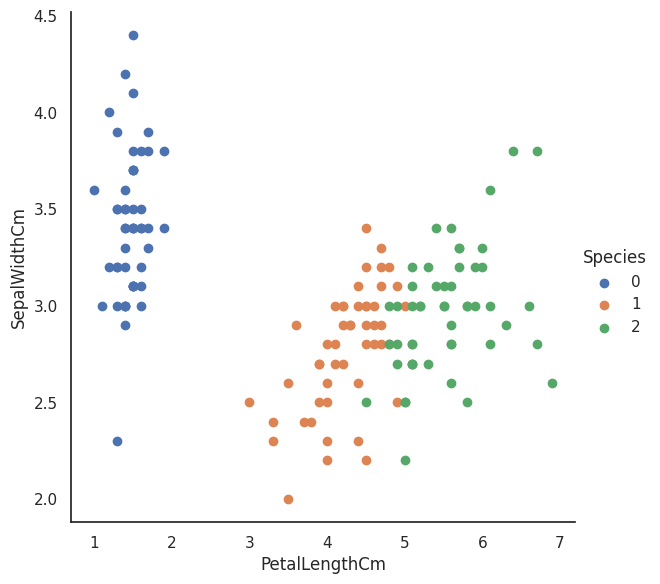

In [33]:
sns.FacetGrid(iris, hue="Species", height=6).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()

Logistic regression
Converting categorical variables into numbers

In [24]:
flower_mapping = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica':2}
iris["Species"] = iris["Species"].map(flower_mapping)

In [64]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Preparing inputs and outputs

In [32]:
x=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=iris[['Species']].values

Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(x, y)

LogisticRegression()

Accuracy

In [45]:
model.score(x,y)

0.9733333333333334

Make predictions

In [40]:
expect = y
predicted = model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Summarize the fit of the model

In [41]:
from sklearn import metrics

In [42]:
print(metrics.classification_report(expect, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [44]:
print(metrics.confusion_matrix(expect, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


Regularization

In [63]:
model = LogisticRegression(C=20,penalty='l2')
model.fit(x, y)
model.score(x,y)

0.98